In [1]:
#XGBoost Regression

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = r"C:\Users\HP 15\Desktop\quiet_data_clean_corrected_2.csv"
quiet_df = pd.read_csv(file_path)
print(quiet_df.head())


    Time  PRN  Elev  Azim    Lat     Lon  vTEC  vTEC_corrected  \
0   3600  Z00     0    90  9.035  38.766  1.12            1.12   
1   7200  Z00     0    90  9.035  38.766  0.26            0.26   
2  10800  Z00     0    90  9.035  38.766  0.54            0.54   
3  14400  Z00     0    90  9.035  38.766  4.03            4.03   
4  18000  Z00     0    90  9.035  38.766  8.76            8.76   

      source_file  Hour  vTEC_log  DOY  YEAR  Kp_index  Sunspot_No  \
0  adisF3_001.10A     1  0.114221    1  2010       0.0          18   
1  adisF3_001.10A     2 -1.343235    1  2010       0.0          18   
2  adisF3_001.10A     3 -0.614336    1  2010       0.0          18   
3  adisF3_001.10A     4  1.394014    1  2010       0.0          18   
4  adisF3_001.10A     5  2.170310    1  2010       0.0          18   

   f10_7_index Condition  
0         72.7     Quiet  
1         72.7     Quiet  
2         72.7     Quiet  
3         72.7     Quiet  
4         72.7     Quiet  


In [3]:
quiet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62459 entries, 0 to 62458
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            62459 non-null  int64  
 1   PRN             62459 non-null  object 
 2   Elev            62459 non-null  int64  
 3   Azim            62459 non-null  int64  
 4   Lat             62459 non-null  float64
 5   Lon             62459 non-null  float64
 6   vTEC            62459 non-null  float64
 7   vTEC_corrected  62459 non-null  float64
 8   source_file     62459 non-null  object 
 9   Hour            62459 non-null  int64  
 10  vTEC_log        62459 non-null  float64
 11  DOY             62459 non-null  int64  
 12  YEAR            62459 non-null  int64  
 13  Kp_index        62459 non-null  float64
 14  Sunspot_No      62459 non-null  int64  
 15  f10_7_index     62459 non-null  float64
 16  Condition       62459 non-null  object 
dtypes: float64(7), int64(7), object

In [5]:
quiet_df.head()

,Time,PRN,Elev,Azim,Lat,Lon,vTEC,vTEC_corrected,source_file,Hour,vTEC_log,DOY,YEAR,Kp_index,Sunspot_No,f10_7_index,Condition
0,3600,Z00,0,90,9.035,38.766,1.12,1.12,adisF3_001.10A,1,0.114221,1,2010,0.0,18,72.7,Quiet
1,7200,Z00,0,90,9.035,38.766,0.26,0.26,adisF3_001.10A,2,-1.343235,1,2010,0.0,18,72.7,Quiet
2,10800,Z00,0,90,9.035,38.766,0.54,0.54,adisF3_001.10A,3,-0.614336,1,2010,0.0,18,72.7,Quiet
3,14400,Z00,0,90,9.035,38.766,4.03,4.03,adisF3_001.10A,4,1.394014,1,2010,0.0,18,72.7,Quiet
4,18000,Z00,0,90,9.035,38.766,8.76,8.76,adisF3_001.10A,5,2.170310,1,2010,0.0,18,72.7,Quiet


In [6]:

quiet_df['Sunspot_No'].unique()

array([ 18,  48,  71,  99, 124,  37,  12,   0,   6,  24,  21,  92,  95,
       133,  40,  15,  17,  16,  47, 120, 130, 153,  51,  11,  13, 126,
       150, 136,  70,  10,  36, 109, 162, 134,  35,  14,  28, 113, 160,
        31,   7, 145,  61,   4,  25, 104, 154,  86,  32,  79, 156,  97,
        22,  26, 148,  90,  20,  63, 163,   8,  52, 128,  38, 118, 119,
        41,   3, 149, 110,  93,  45,  30,  80,  44, 141,  74,  58,  43,
       116,  54, 105,  66,  33,  29, 102,  62,  56, 112, 129,  64,  75,
        55,  67,  68,  60, 146,  57,  19,  23,  34,  76,  49, 100,  27,
        69,  65,  72,  83,  77,  94,  53,  89,  59,   9, 127,  39, 144,
       108,  42, 167, 103, 171, 147,   2,  84,  50,  46, 137, 158,  85,
       161,  78,  87, 106,  82, 114, 107, 207, 220, 196, 155,  96,  73,
        88, 111, 138, 115,  81,  91, 101, 132, 123, 122, 139, 151,  98,
       135,   5, 121, 117, 125, 187, 199, 178, 140, 173, 168, 142, 165,
       166, 164, 206, 183, 131, 174, 197, 182, 172, 194, 185, 14

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [11]:
# 3. Feature engineering: cyclical encoding
quiet_df['DOY_s'] = np.sin(2 * np.pi * quiet_df['DOY'] / 365)
quiet_df['DOY_c'] = np.cos(2 * np.pi * quiet_df['DOY'] / 365)
quiet_df['HH_s'] = np.sin(2 * np.pi * quiet_df['Hour'] / 24)
quiet_df['HH_c'] = np.cos(2 * np.pi * quiet_df['Hour'] / 24)

In [12]:
from sklearn.preprocessing import StandardScaler

# === 1. Select features and target ===
features = ['DOY_s', 'DOY_c', 'HH_s', 'HH_c', 'Sunspot_No', 'Lat', 'Lon', 'f10_7_index', 'YEAR']
target = 'vTEC_corrected'

X = quiet_df[features]
y = quiet_df[target]

In [13]:
# === Separate by year ===
train_df = quiet_df[quiet_df['YEAR'] <= 2018]
test_df = quiet_df[quiet_df['YEAR'] >= 2019]

# === Split features and target ===
X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# === Scale after split to avoid data leakage ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# 5. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
!pip install xgboost

XGBoost Regression
MSE: 13.5845
R²: 0.8023


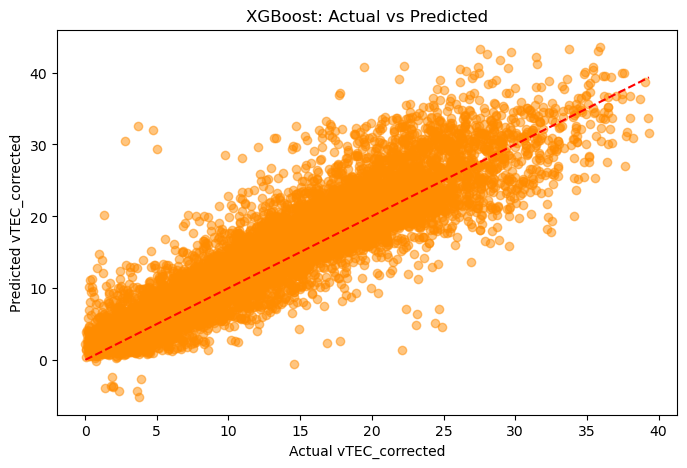

In [16]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# You may need to install it first: pip install xgboost

# Train XGBoost regressor
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("XGBoost Regression")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='darkorange')
plt.xlabel("Actual vTEC_corrected")
plt.ylabel("Predicted vTEC_corrected")
plt.title("XGBoost: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()